In [1]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn import metrics
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

import pickle
import time

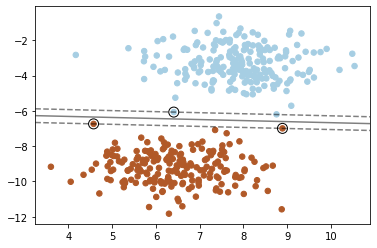

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples=400, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Actual Data Classification

## Dealing with Data Crap

### Training Data

In [3]:
with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/train_vectors/train_features.pkl", "rb") \
        as input_file:  train_features = pickle.load(input_file)
    
with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/train_vectors/train_labels.pkl", "rb") \
    as input_file:  train_labels = pickle.load(input_file)

### Testing Data

In [4]:
with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/test_vectors/test_features.pkl", "rb") \
        as input_file:  test_features = pickle.load(input_file)
    
with open("/Users/collopa/Desktop/nonlinear/project/Colin_Eli_Kai_Math178_Final/data/test_vectors/test_labels.pkl", "rb") \
    as input_file:  test_labels = pickle.load(input_file)

## SVM

In [5]:
t = time.time()

clf = svm.SVC()
clf.fit(train_features, train_labels)

elapsed = time.time() - t
print(elapsed)

539.9923090934753


In [6]:
t = time.time()

pred = clf.predict(test_features)
elapsed = time.time() - t

print(elapsed)

119.34767198562622


Kai thinks this will take 30 minutes. I (Colin) predict 10. Update: Colin won.

In [10]:
print("Accuracy:", metrics.accuracy_score(test_labels, pred))

Accuracy: 0.1976858207491665
